In [ ]:
import random
import string
import numpy as np
import pandas as pd
from claptcha import Claptcha
import os,os.path
import cv2
import glob
import imutils
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [ ]:
import os
newpath = r'/content/Generated_captchas'
if not os.path.exists(newpath):
    os.makedirs(newpath)
    newpath1 = r'/content/Preprocessed'
if not os.path.exists(newpath1):
    os.makedirs(newpath1)
    newpath2 = r'/content/Test_data'
if not os.path.exists(newpath2):
    os.makedirs(newpath2)
    newpath3 = r'/content/Test_data_Preprocessed'
if not os.path.exists(newpath3):
    os.makedirs(newpath3)

In [ ]:
def randomString():
    '''random string generator to generate captchas with letters and numbers'''
    rndLetters = (random.choice(string.ascii_uppercase+string.ascii_lowercase+string.digits) for _ in range(4)) #+string.ascii_uppercase +string.ascii_lowercase+string.ascii_uppercase
    return "".join(rndLetters)

In [ ]:
captcha_text = []  ## empty
n=1500
for i in range(1,n):
    text = randomString()  # text = adcd
    c = Claptcha(text, "FreeMono.ttf", (150,90),
             resample=Image.BICUBIC, noise=0.2)   # image is generated with abcd
    c.margin = (25,25)
    text, _ = c.write('Generated_captchas\\'+text+'.png')  ## Generated_captchas\\abcd.png
    captcha_text.append(text) # [abcd,adbd]

In [ ]:

import os
import glob
import shutil

source = '/content'
destination = '/content/Generated_captchas'
#
# gather all files
allfiles = glob.glob(os.path.join(source, '*Generated_captchas\*'), recursive=True)
print("Files to move", allfiles)

# iterate on all files to move them to destination folder
for file_path in allfiles:
    dst_path = os.path.join(destination, os.path.basename(file_path))
    shutil.move(file_path, dst_path)

Files to move ['/content/Generated_captchas\\uP0d.png', '/content/Generated_captchas\\wGhI.png', '/content/Generated_captchas\\qWCH.png', '/content/Generated_captchas\\ohRd.png', '/content/Generated_captchas\\kjOx.png', '/content/Generated_captchas\\hQBt.png', '/content/Generated_captchas\\Avny.png', '/content/Generated_captchas\\FZpf.png', '/content/Generated_captchas\\9Qkt.png', '/content/Generated_captchas\\m1we.png', '/content/Generated_captchas\\VghY.png', '/content/Generated_captchas\\qj3P.png', '/content/Generated_captchas\\o35K.png', '/content/Generated_captchas\\KtNq.png', '/content/Generated_captchas\\6U4w.png', '/content/Generated_captchas\\djD6.png', '/content/Generated_captchas\\O4sc.png', '/content/Generated_captchas\\E3Nm.png', '/content/Generated_captchas\\snu3.png', '/content/Generated_captchas\\AXqd.png', '/content/Generated_captchas\\GoZg.png', '/content/Generated_captchas\\pyEh.png', '/content/Generated_captchas\\WwTn.png', '/content/Generated_captchas\\C7TU.png', '

In [ ]:
## Saving the captchas texts separately as they are the labels for our identification
a = pd.Series(captcha_text)
a.to_csv('Captcha_label.csv')

In [ ]:
##Folder for Generated Images and Preprocessed Images - Make sure these folders are created in present working directory
captchas_folder = "Generated_captchas/"
preprocessed_captchas = "Preprocessed/"

In [ ]:
## A function to save the images
def saveimage(letter_text,letter_image):
    path = os.path.join(preprocessed_captchas, letter_text)
    # img = cv2.resize(letter_image,(300,300))
    if not os.path.exists(path):
        os.makedirs(path)
    p = os.path.join(path, str(random.randint(1,10000))+".png")
    cv2.imwrite(p, letter_image)

In [ ]:
captcha_images=  glob.glob(os.path.join(captchas_folder, "*"))

In [ ]:
for file in captcha_images:
    #Get the file name                             #Generated_captchas\02qt.png
    mystr = file.split('/')
    value = mystr[-1].split('\\')[1].split('.')[0]   #value= 02qt
    #Read image
    image = cv2.imread(file)
    #gray scaled imagea
    gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #Adding threshold to the image
    image = cv2.threshold(gray_scale,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]   #_INV|cv2.THRESH_OTSU
    #Slicing the image and saving the image file
    slicedImage = image[0:image.shape[0],10:40]
    letter = value[0]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],40:70]
    letter = value[1]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],70:100]
    letter = value[2]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],100:130]
    letter = value[3]
    saveimage(letter,slicedImage)

In [ ]:
def randomString():
    '''random string generator to generate captchas with letters and numbers'''
    rndLetters = (random.choice(string.ascii_uppercase+string.ascii_lowercase+string.digits) for _ in range(4)) #+string.ascii_uppercase +string.ascii_lowercase+string.ascii_uppercase
    return "".join(rndLetters)

In [ ]:
captcha_text = []
n=101
for i in range(1,n):
    text = randomString()
    c = Claptcha(text, "FreeMono.ttf", (150,90),
             resample=Image.BICUBIC, noise=0.2)
    c.margin = (25,25)
    text, _ = c.write('Generated_captchas\\'+text+'.png')
    captcha_text.append(text)

In [ ]:
import os
import glob
import shutil

source = '/content'
destination = '/content/Test_data'
#
# gather all files
allfiles = glob.glob(os.path.join(source, '*Generated_captchas\*'), recursive=True)
print("Files to move", allfiles)

# iterate on all files to move them to destination folder
for file_path in allfiles:
    dst_path = os.path.join(destination, os.path.basename(file_path))
    shutil.move(file_path, dst_path)

Files to move ['/content/Generated_captchas\\Zcpj.png', '/content/Generated_captchas\\YYQ7.png', '/content/Generated_captchas\\gUbX.png', '/content/Generated_captchas\\yCKB.png', '/content/Generated_captchas\\jMOq.png', '/content/Generated_captchas\\VKa4.png', '/content/Generated_captchas\\ghzg.png', '/content/Generated_captchas\\Kv9K.png', '/content/Generated_captchas\\NMfS.png', '/content/Generated_captchas\\mO5R.png', '/content/Generated_captchas\\vGjl.png', '/content/Generated_captchas\\dhH3.png', '/content/Generated_captchas\\xj40.png', '/content/Generated_captchas\\l7R8.png', '/content/Generated_captchas\\cjzf.png', '/content/Generated_captchas\\CU9k.png', '/content/Generated_captchas\\FfVe.png', '/content/Generated_captchas\\1uCi.png', '/content/Generated_captchas\\1TNm.png', '/content/Generated_captchas\\nu4c.png', '/content/Generated_captchas\\oTr2.png', '/content/Generated_captchas\\vQm2.png', '/content/Generated_captchas\\DeGT.png', '/content/Generated_captchas\\zUFm.png', '

In [ ]:
captchas_folder = "Test_data/"
preprocessed_captchas = "Test_data_Preprocessed/"

In [ ]:
## A function to save the images
def saveimage(letter_text,letter_image):
    path = os.path.join(preprocessed_captchas, letter_text)
    # img = cv2.resize(letter_image,(300,300))
    if not os.path.exists(path):
        os.makedirs(path)
    p = os.path.join(path, str(random.randint(1,10000))+".png")
    cv2.imwrite(p, letter_image)

In [ ]:
captcha_images=  glob.glob(os.path.join(captchas_folder, "*"))

In [ ]:
for file in captcha_images:
    #Get the file name                             #Generated_captchas\02qt.png
    mystr = file.split('/')
    value = mystr[-1].split('\\')[1].split('.')[0]   #value= 02qt
    #Read image
    image = cv2.imread(file)
    #gray scaled imagea
    gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #Adding threshold to the image
    image = cv2.threshold(gray_scale,0,255,cv2.THRESH_BINARY|cv2.THRESH_OTSU)[1]   #_INV|cv2.THRESH_OTSU
    #Slicing the image and saving the image file
    slicedImage = image[0:image.shape[0],10:40]
    letter = value[0]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],40:70]
    letter = value[1]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],70:100]
    letter = value[2]
    saveimage(letter,slicedImage)
    slicedImage = image[0:image.shape[0],100:130]
    letter = value[3]
    saveimage(letter,slicedImage)

In [ ]:
from tensorflow import keras
from keras.models import Sequential,load_model
from keras.layers import Conv2D,Input, Add
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense, Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import EarlyStopping

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
    # rotation_range=8,      # Rotate images randomly up to 10 degrees
    # width_shift_range=0.1,  # Shift images horizontally by up to 10% of the width
    # height_shift_range=0.1, # Shift images vertically by up to 10% of the height
    # shear_range=0.2,        # Shear intensity (angle in counter-clockwise direction)
    # zoom_range=0.2,         # Zoom randomly up to 20%
    # horizontal_flip=True,   # Flip images horizontally
    # vertical_flip=False,    # Do not flip images vertically
    # fill_mode='nearest'
)
valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
## Training data generation - from directory Preprocessed
training_set = train_datagen.flow_from_directory('Preprocessed/',
target_size = (32, 32),
batch_size = 32,
class_mode = 'categorical',color_mode='grayscale')
total_images = training_set.samples
print("Total images found:", total_images)

Validation_set = valid_datagen.flow_from_directory('Test_data_Preprocessed/',
target_size = (32, 32),
batch_size = 32,
class_mode = 'categorical',color_mode='grayscale')
total_images = Validation_set.samples
print("Total images found:", total_images)


Found 5966 images belonging to 62 classes.
Total images found: 5966
Found 400 images belonging to 62 classes.
Total images found: 400


In [ ]:
## Printing the different classes - 0 to 35 classes - refers to 0-9 and A-Z
training_set.classes

array([ 0,  0,  0, ..., 61, 61, 61], dtype=int32)

In [ ]:
classifier_0 = Sequential()
classifier_0.add(Conv2D(16, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
classifier_0.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier_0.add(Conv2D(16, (5, 5), activation = 'relu'))
classifier_0.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
classifier_0.add(Flatten())
classifier_0.add(Dense(units = 250, activation = 'relu'))
classifier_0.add(Dense(units = 62, activation = 'softmax'))
# Compiling the CNN
classifier_0.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/8
187/187 [==============================] - 8s 38ms/step - loss: 4.0014 - accuracy: 0.0392 - val_loss: 3.5035 - val_accuracy: 0.1325
Epoch 2/8
187/187 [==============================] - 9s 46ms/step - loss: 2.8436 - accuracy: 0.2414 - val_loss: 2.3791 - val_accuracy: 0.3400
Epoch 3/8
187/187 [==============================] - 8s 40ms/step - loss: 1.9233 - accuracy: 0.4516 - val_loss: 1.7497 - val_accuracy: 0.5150
Epoch 4/8
187/187 [==============================] - 6s 31ms/step - loss: 1.4305 - accuracy: 0.5823 - val_loss: 1.5192 - val_accuracy: 0.5450
Epoch 5/8
187/187 [==============================] - 7s 37ms/step - loss: 1.1608 - accuracy: 0.6567 - val_loss: 1.3844 - val_accuracy: 0.6175
Epoch 6/8
187/187 [==============================] - 6s 30ms/step - loss: 0.9519 - accuracy: 0.7127 - val_loss: 1.3501 - val_accuracy: 0.6050
Epoch 7/8
187/187 [==============================] - 8s 41ms/step - loss: 0.8106 - accuracy: 0.7553 - val_loss: 1.2544 - val_accuracy: 0.6400
Epoch 

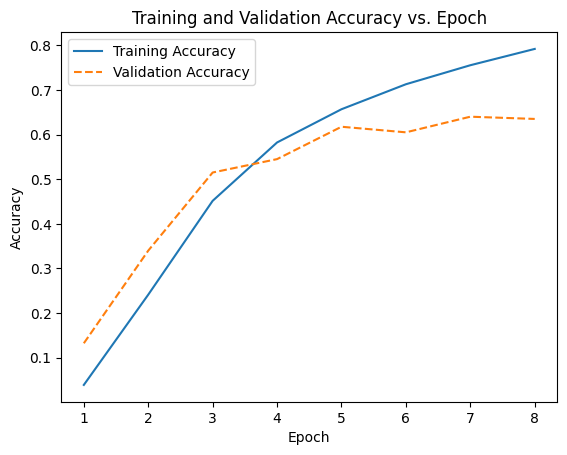

In [ ]:
import matplotlib.pyplot as plt



# Fit the model and store the training history
history = classifier_0.fit(x=training_set, epochs=8, validation_data = Validation_set)

# Plotting the training accuracy vs. epoch
plt.plot(range(1, 9), history.history['accuracy'], label='Training Accuracy')
# Plotting the validation accuracy vs. epoch
plt.plot(range(1, 9), history.history['val_accuracy'], linestyle='--', label='Validation Accuracy')

plt.title('Training and Validation Accuracy vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [ ]:
d = training_set.class_indices

In [ ]:
## Hierarchical Data format file to save the model. So that we dont have to run the entire sequence of program again.
classifier_0.save('captchaclassifier_0.hdf5')

In [ ]:
captcha_model_2 = load_model('captchaclassifier_0.hdf5')

In [ ]:
captcha_image_files =  glob.glob(os.path.join('Test_data_1', "*"))

In [ ]:
dict_class = {v:k for k,v in d.items()}


In [ ]:
# Counter to count the number of correct predictions
count = 0

# Variables to count different percentage ranges
count_25 = 0
count_50 = 0
count_75 = 0
count_100 = 0
count_0 = 0

# Predict function to test all the images from the Test_data directory
for file in captcha_image_files:
    combine = []
    # Get the file name
    # mystr = file.split('\\')
    # value1 = mystr[-1].split('.')[0]
    file_name = file.split('/')[-1]  # Extract just the file name part
    # Remove the file extension
    value1 = file_name.split('.')[0]
    # Read image
    image = cv2.imread(file)
    gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  ##converts rgb image to grayscale
    image = cv2.threshold(gray_scale, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

    # Slicing the image and saving the file
    def predict_letter(start, end):
        slicedImage = image[0:90, start:end]
        resized = cv2.resize(slicedImage, (32, 32))
        img = np.expand_dims(resized, axis=2)
        img = np.expand_dims(img, axis=0)
        pred = captcha_model_2.predict(img)
        pred_class = np.argmax(pred, axis=1)
        return dict_class[pred_class[0]]

    # Predict each letter
    combine.append(predict_letter(10, 40))
    combine.append(predict_letter(40, 70))
    combine.append(predict_letter(70, 100))
    combine.append(predict_letter(100, 130))

    predict = ''.join(combine)
    print("Original:", value1)
    print("Predicted:", predict)

    # Calculate and print the percentage of correct predictions
    correct_percentage = sum(a == b for a, b in zip(value1, predict)) / len(value1) * 100
    print("Percentage is {:.2f}%".format(correct_percentage))

    # Update counts for different percentage ranges
    if correct_percentage == 25:
        count_25 += 1
    elif correct_percentage == 0:
        count_0 += 1
    elif correct_percentage == 50:
        count_50 += 1
    elif correct_percentage == 75:
        count_75 += 1
    elif correct_percentage == 100:
        count_100 += 1

    print("------------")

    # If the predicted and actual captcha letters match, increment the counter
    if value1 == predict:
        count += 1

# Print the overall accuracy
total_images = len(captcha_image_files)
accuracy = (count / total_images) * 100
print("\nOverall Accuracy: {:.2f}%".format(accuracy))

# Print counts for different percentage ranges
print("0% Correct: {}".format(count_0))
print("25% Correct: {}".format(count_25))
print("50% Correct: {}".format(count_50))
print("75% Correct: {}".format(count_75))
print("100% Correct: {}".format(count_100))


1/1 [==============================] - 0s 22ms/step
Original: bMZc
Predicted: bMZe
Percentage is 75.00%
------------
1/1 [==============================] - 0s 22ms/step
Original: DN2k
Predicted: DN2x
Percentage is 75.00%
------------
1/1 [==============================] - 0s 22ms/step
Original: Nw3V
Predicted: Nw3V
Percentage is 100.00%
------------
1/1 [==============================] - 0s 33ms/step
Original: vlvD
Predicted: vlvD
Percentage is 100.00%
------------
1/1 [==============================] - 0s 23ms/step
Original: B4Rc
Predicted: R4Rc
Percentage is 75.00%
------------
1/1 [==============================] - 0s 23ms/step
Original: a6Xl
Predicted: a6Xl
Percentage is 100.00%
------------
1/1 [==============================] - 0s 23ms/step
Original: JsAD
Predicted: 3sAo
Percentage is 50.00%
------------
1/1 [==============================] - 0s 24ms/step
Original: 0Jq2
Predicted: 0Jd2
Percentage is 75.00%
------------
1/1 [==============================] - 0s 23ms/step
Original:

In [ ]:
class_indices = {label: index for index, label in enumerate(class_labels)}

print(class_indices)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'A': 10, 'B': 11, 'C': 12, 'D': 13, 'E': 14, 'F': 15, 'G': 16, 'H': 17, 'I': 18, 'J': 19, 'K': 20, 'L': 21, 'M': 22, 'N': 23, 'O': 24, 'P': 25, 'Q': 26, 'R': 27, 'S': 28, 'T': 29, 'U': 30, 'V': 31, 'W': 32, 'X': 33, 'Y': 34, 'Z': 35, 'a': 36, 'b': 37, 'c': 38, 'd': 39, 'e': 40, 'f': 41, 'g': 42, 'h': 43, 'i': 44, 'j': 45, 'k': 46, 'l': 47, 'm': 48, 'n': 49, 'o': 50, 'p': 51, 'q': 52, 'r': 53, 's': 54, 't': 55, 'u': 56, 'v': 57, 'w': 58, 'x': 59, 'y': 60, 'z': 61}


In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

# Define data generators
train_datagen = ImageDataGenerator(rescale = 1./255)
valid_datagen = ImageDataGenerator(rescale = 1./255)

# Define parameters
target_size = (32, 32)
batch_size = 32
num_classes = 62
num_folds = 5
epochs = 10

# Define K-fold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True)

# Load data and create generators
training_set = train_datagen.flow_from_directory('Preprocessed/',
                                                 target_size=target_size,
                                                 batch_size=batch_size,
                                                 class_mode='categorical',
                                                 color_mode='grayscale')

Validation_set = valid_datagen.flow_from_directory('Test_data_Preprocessed/',
                                                   target_size=target_size,
                                                   batch_size=batch_size,
                                                   class_mode='categorical',
                                                   color_mode='grayscale')

# Define the model
def create_model():
    model = Sequential()
    model.add(Conv2D(16, (5, 5), input_shape=(32, 32, 1), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Conv2D(16, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Flatten())
    model.add(Dense(units=250, activation='relu'))
    model.add(Dense(units=num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Perform K-fold cross-validation
fold_accuracy = []
for fold, (train_indices, val_indices) in enumerate(kf.split(training_set)):
    print(f'Fold {fold + 1}/{num_folds}')
    # Create new model for each fold
    model = create_model()
    # Train the model on this fold
    history = model.fit(x=training_set,
                        epochs=epochs,
                        validation_data=Validation_set,
                        validation_steps=len(Validation_set),
                        steps_per_epoch=len(train_indices))
    fold_accuracy.append(history.history['val_accuracy'])

# Compute average accuracy across all folds
avg_accuracy = np.mean(fold_accuracy, axis=0)
print('Average validation accuracy across all folds:', avg_accuracy)

# Find the best fold
best_fold_index = np.argmax(avg_accuracy)
print('Best fold index:', best_fold_index)

# Save the model from the best fold
best_model = create_model()
best_model.fit(x=training_set, epochs=epochs)
best_model.save('best_model.h5')
print('Best model saved as best_model.h5')


# from keras.layers import Dropout

# classifier_0 = Sequential()
# classifier_0.add(Conv2D(256, (5, 5), input_shape = (32, 32, 1), activation = 'relu'))
# classifier_0.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
# classifier_0.add(Dropout(0.25))
# classifier_0.add(Conv2D(256, (5, 5), activation = 'relu'))
# classifier_0.add(MaxPooling2D(pool_size = (2, 2),strides=(2,2)))
# classifier_0.add(Dropout(0.25))
# classifier_0.add(Flatten())
# classifier_0.add(Dense(units = 500, activation = 'relu'))
# classifier_0.add(Dropout(0.5))
# classifier_0.add(Dense(units = 62, activation = 'softmax'))
# classifier_0.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])



Found 19654 images belonging to 62 classes.
Found 400 images belonging to 62 classes.
Fold 1/5
Epoch 1/10
492/492 [==============================] - 22s 41ms/step - loss: 3.2192 - accuracy: 0.1857 - val_loss: 1.9379 - val_accuracy: 0.4525
Epoch 2/10
492/492 [==============================] - 18s 37ms/step - loss: 1.3857 - accuracy: 0.5963 - val_loss: 1.1527 - val_accuracy: 0.6575
Epoch 3/10
492/492 [==============================] - 17s 34ms/step - loss: 0.9010 - accuracy: 0.7291 - val_loss: 0.7914 - val_accuracy: 0.7800
Epoch 4/10
492/492 [==============================] - 17s 35ms/step - loss: 0.6921 - accuracy: 0.7859 - val_loss: 0.7437 - val_accuracy: 0.8000
Epoch 5/10
492/492 [==============================] - 18s 37ms/step - loss: 0.5671 - accuracy: 0.8235 - val_loss: 0.6615 - val_accuracy: 0.7900
Epoch 6/10
492/492 [==============================] - 18s 36ms/step - loss: 0.4722 - accuracy: 0.8532 - val_loss: 0.6021 - val_accuracy: 0.8300
Epoch 7/10
492/492 [=====================

In [ ]:
!zip -r /content/Test_data_44 /content/Test_data

  adding: content/Test_data/ (stored 0%)
  adding: content/Test_data/Generated_captchas\Kgsi.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\PSR6.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\vHtz.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\7gje.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\wE4K.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\fUOG.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\D2gD.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\9PAU.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\oozh.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\bstx.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\wNtx.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\VXO6.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\xfIZ.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\Sy

In [ ]:
!zip -r /content/Test_captchas /content/Test_data

  adding: content/Test_data/ (stored 0%)
  adding: content/Test_data/Generated_captchas\KhwE.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\S890.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\E3E9.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\yJVh.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\LhK2.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\3ZBw.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\riVW.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\2ZPI.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\dZ2Y.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\tOls.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\CJHP.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\DpJB.png (deflated 0%)
  adding: content/Test_data/Generated_captchas\SXF1.png (deflated 1%)
  adding: content/Test_data/Generated_captchas\d7

In [ ]:
from tensorflow import keras
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Load pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))

# Freeze the layers of the VGG16 model so that they are not trainable
for layer in base_model.layers:
    layer.trainable = False

# Create a new model by adding your custom classifier on top of the VGG16 base
x = base_model.output
x = Conv2D(128, (3, 3), activation='relu')(x)
# x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Dropout(0.25)(x)  # Adding Dropout
x = Flatten()(x)
x = Dense(units=500, activation='relu')(x)
x = Dense(units=36, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 2s 0us/step


In [ ]:
# Now you can train the model using your data
model.fit(x=training_set, steps_per_epoch=int(total_images/32), epochs=8)

Epoch 1/8
189/222 [========================>.....] - ETA: 10:25 - loss: 1.7021 - accuracy: 0.4987

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have your training data generator as training_set

# Fit the first model and store the training history
history_model_1 = classifier_0.fit(x=training_set, steps_per_epoch=int(total_images/32), epochs=8)

history_model_2 = model.fit(x=training_set, steps_per_epoch=int(total_images/32), epochs=8)

# Plotting the training loss vs. epoch for both models
plt.plot(range(1, 9), history.history['loss'], label='Model 1 Loss', color='blue')
plt.plot(range(1, 9), history1.history['loss'], label='Model 2 Loss', color='orange')

plt.title('Training Loss vs. Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Counter to count the number of correct predictions
count = 0

# Variables to count different percentage ranges
count_25 = 0
count_50 = 0
count_75 = 0
count_100 = 0
count_0 = 0

# Predict function to test all the images from the Test_data directory
for file in captcha_image_files:
    combine = []
    # Get the file name
    mystr = file.split('\\')
    value1 = mystr[-1].split('.')[0]
    # Read image
    image = cv2.imread(file)
    # gray_scale = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  ##converts rgb image to grayscale
    # image = cv2.threshold(imag, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]

    # Slicing the image and saving the file
    def predict_letter(start, end):
        slicedImage = image[0:90, start:end]
        resized = cv2.resize(slicedImage, (224, 224))
        img = np.expand_dims(resized, axis=0)
        # img = np.expand_dims(img, axis=0)
        pred = captcha_model_2.predict(img)
        pred_class = np.argmax(pred, axis=1)
        return dict_class[pred_class[0]]

    # Predict each letter
    combine.append(predict_letter(10, 40))
    combine.append(predict_letter(40, 70))
    combine.append(predict_letter(70, 100))
    combine.append(predict_letter(100, 130))

    predict = ''.join(combine)
    print("Original:", value1)
    print("Predicted:", predict)

    # Calculate and print the percentage of correct predictions
    correct_percentage = sum(a == b for a, b in zip(value1, predict)) / len(value1) * 100
    print("Percentage is {:.2f}%".format(correct_percentage))

    # Update counts for different percentage ranges
    if correct_percentage == 25:
        count_25 += 1
    elif correct_percentage == 0:
        count_0 += 1
    elif correct_percentage == 50:
        count_50 += 1
    elif correct_percentage == 75:
        count_75 += 1
    elif correct_percentage == 100:
        count_100 += 1

    print("------------")

    # If the predicted and actual captcha letters match, increment the counter
    if value1 == predict:
        count += 1

# Print the overall accuracy
total_images = len(captcha_image_files)
accuracy = (count / total_images) * 100
print("\nOverall Accuracy: {:.2f}%".format(accuracy))

# Print counts for different percentage ranges
print("0% Correct: {}".format(count_0))
print("25% Correct: {}".format(count_25))
print("50% Correct: {}".format(count_50))
print("75% Correct: {}".format(count_75))
print("100% Correct: {}".format(count_100))


In [ ]:
import os
import shutil
path = '/content/Test_data'
shutil.rmtree(path, ignore_errors=False, onerror=None)
path = '/content/Preprocessed'
shutil.rmtree(path, ignore_errors=False, onerror=None)
path = '/content/Generated_captchas'
shutil.rmtree(path, ignore_errors=False, onerror=None)
path = '/content/Test_data_Preprocessed'
shutil.rmtree(path, ignore_errors=False, onerror=None)

In [ ]:
path = '/content/Test_data_c'
shutil.rmtree(path, ignore_errors=False, onerror=None)

In [ ]:
import cv2
import pandas
import seaborn
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
path1 = '/content/Generated_captchas/Generated_captchas\05LH.png'
path2 = '/content/Generated_captchas/Generated_captchas\1IP0.png'

In [ ]:
def plot_ (img1, img2) :
    plt.figure(figsize = (20,5))

    plt.subplot(1,2,1)
    plt.imshow(img1, 'gray')

    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(img2, 'gray')

    plt.axis('off')

TypeError: Image data of dtype object cannot be converted to float

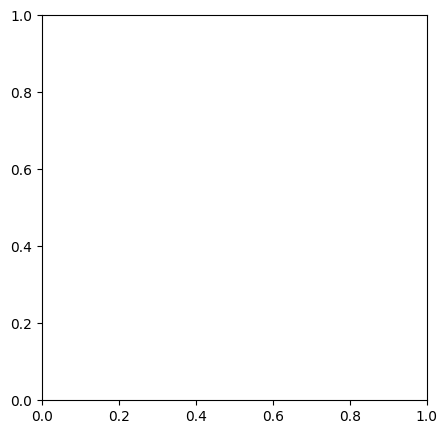

In [ ]:
img1 = cv2.imread(path1, cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread(path2, cv2.IMREAD_GRAYSCALE)
plot_(img1, img2)

In [ ]:
thresh_img1 = cv2.adaptiveThreshold(img1, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 103, 0)
thresh_img2 = cv2.adaptiveThreshold(img2, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 145, 0)
plot_(thresh_img1, thresh_img2)

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/smooth.dispatch.cpp:617: error: (-215:Assertion failed) !_src.empty() in function 'GaussianBlur'


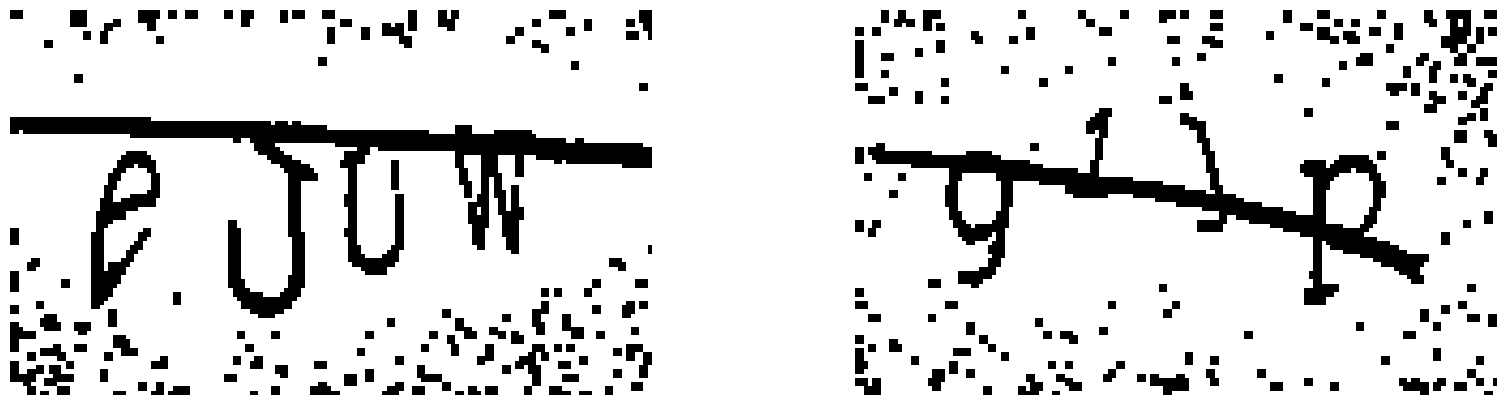

In [ ]:
close_img1 = cv2.morphologyEx(thresh_img1, cv2.MORPH_CLOSE, np.ones((2,2), np.uint8))
close_img2 = cv2.morphologyEx(thresh_img2, cv2.MORPH_CLOSE, np.ones((2,2), np.uint8))
plot_(close_img1, close_img2)

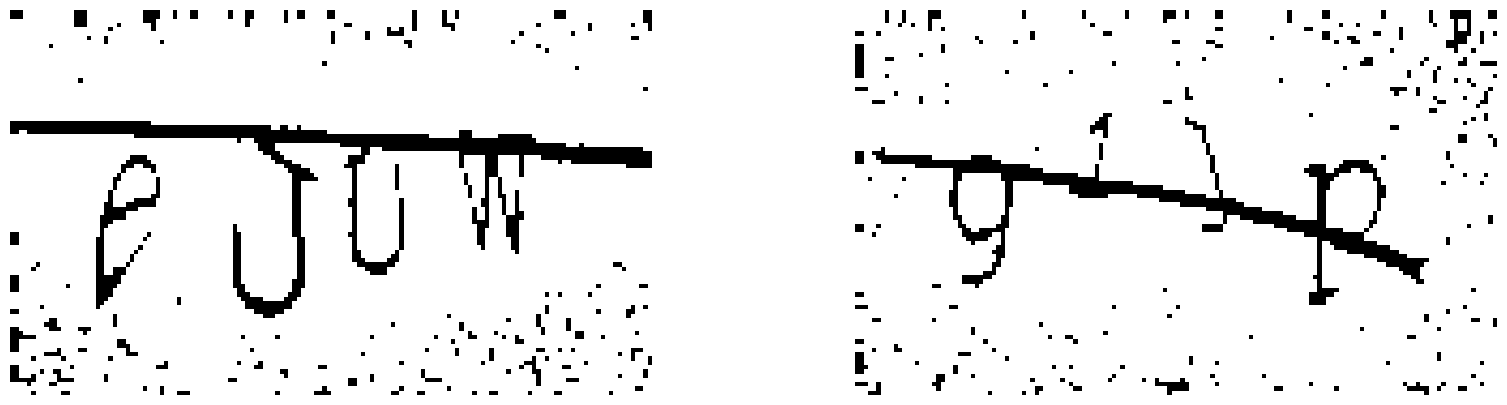

In [ ]:
dilate_img1 = cv2.dilate(close_img1, np.ones((2,2), np.uint8), iterations = 1)
dilate_img2 = cv2.dilate(close_img2, np.ones((2,2), np.uint8), iterations = 1)
plot_(dilate_img1, dilate_img2)

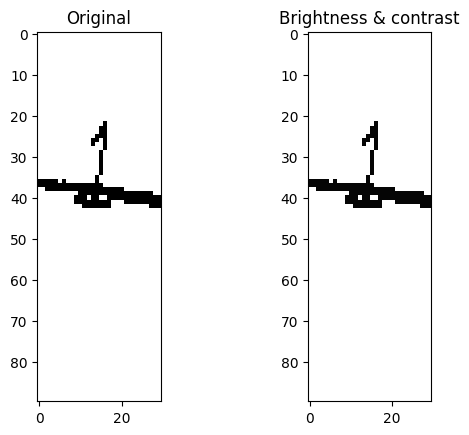

In [ ]:
#Import the necessary libraries
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Load the image
image = cv2.imread('/content/Preprocessed/1/6560.png')

#Plot the original image
plt.subplot(1, 2, 1)
plt.title("Original")
plt.imshow(image)

# Adjust the brightness and contrast
# Adjusts the brightness by adding 10 to each pixel value
brightness = 5
# Adjusts the contrast by scaling the pixel values by 2.3
contrast = 200
image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)

#Save the image
cv2.imwrite('modified_image.jpg', image2)
#Plot the contrast image
plt.subplot(1, 2, 2)
plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()


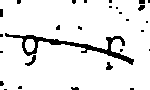

In [ ]:
from google.colab.patches import cv2_imshow
# image = cv2.imread('/content/Generated_captchas\eJUW.png')
image = cv2.blur(dilate_img2, (3, 3))
ret, image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY)

image = cv2.dilate(image, np.ones((3, 1), np.uint8))
image = cv2.erode(image, np.ones((2, 2), np.uint8))

cv2_imshow(np.array(image))


In [ ]:
from keras.models import Model

def residual_module(data, filters, kernel_size, stride, activation='relu'):
    shortcut = data
    x = Conv2D(filters, kernel_size, strides=stride, padding='same')(data)
    x = Conv2D(filters, kernel_size, activation=activation, padding='same')(x)
    x = Add()([x, shortcut])
    return x

classifier = Sequential()
input_layer = Input(shape=(32, 32, 1))
x = Conv2D(128, (5, 5), strides=(1, 1), padding='same', activation='relu')(input_layer)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = residual_module(x, 128, (5, 5), (1, 1))
x = residual_module(x, 128, (5, 5), (1, 1))
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)
x = Flatten()(x)
# x = Dense(2000, activation='relu')(x
output_layer = Dense(62, activation='softmax')(x)
classifier = Model(inputs=input_layer, outputs=output_layer)
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from PIL import Image
from operator import itemgetter

im = Image.open("Generated_captchas_k0w3.gif")
im = im.convert("P")
his = im.histogram()

values = {}

for i in range(256):
    values[i] = his[i]

for j,k in sorted(values.items(), key=itemgetter(1), reverse=True)[:10]:
    print (j,k)

FileNotFoundError: ignored

In [ ]:
from PIL import Image

im = Image.open("Generated_captchas_k0w3.gif")
im = im.convert("P")
im2 = Image.new("P",im.size,225)

im = im.convert("P")

temp = {}

for x in range(im.size[1]):
    for y in range(im.size[0]):
        pix = im.getpixel((y,x))
        temp[pix] = pix
        if pix == 219 or pix == 218 or pix == 224 or pix == 225: # these are the numbers to get_
            im2.putpixel((y,x),0)
            im2.save("output1.gif")

In [ ]:
from PIL import Image

im2 = Image.open("Generated_captchas_k0w3.gif")
im2.save("im3.png")
captchas_folder1 = "testimage/"
captcha_images1=  glob.glob(os.path.join(captchas_folder1, "*"))
for file in captcha_images1:
  image = cv2.imread(im2)
  gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
  cv2.imshow('im5',gray_scale)
temp = {}


# new code starts here_

inletter = False
foundletter = False
start = 0
end = 0

letters = []

for y in range(im2.size[0]): # slice across_
    for x in range(im2.size[1]): # slice down_
        pix = im2.getpixel((y,x))
        if pix == 225:
            inletter = True

    if foundletter == False and inletter == True:
        foundletter = True
        start = y

    if foundletter == True and inletter == False:
        foundletter = False
        end = y
        letters.append((start,end))

    inletter = False # reset inletter to False for the next row of pixels
    if end != 0:
        foundletter = False # reset foundletter to False for the next letter

print(letters)


In [ ]:
import cv2
import numpy as np
import pytesseract

# Load the captcha image
captcha_image = cv2.imread('captcha_image.png', cv2.IMREAD_GRAYSCALE)

# Preprocessing Techniques
# Apply noise removal
captcha_image = cv2.medianBlur(captcha_image, 3)

# Apply contrast enhancement
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
captcha_image = clahe.apply(captcha_image)

# Apply image binarization
_, captcha_image = cv2.threshold(captcha_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Perform text extraction
# Detect contours
contours, _ = cv2.findContours(captcha_image.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Filter and extract potential text regions
text_regions = []
for contour in contours:
    (x, y, w, h) = cv2.boundingRect(contour)
    aspect_ratio = w / float(h)
    if 1.2 <= aspect_ratio <= 3.0 and w > 10 and h > 20:
        text_regions.append((x, y, w, h))

# Sort the text regions from left to right
text_regions = sorted(text_regions, key=lambda x: x[0])

# Extract text using OCR (Tesseract)
captcha_text = ''
for region in text_regions:
    x, y, w, h = region
    roi = captcha_image[y:y + h, x:x + w]
    captcha_text += pytesseract.image_to_string(roi, config='--psm 10')

# Remove unwanted characters and keep only alphanumeric characters
captcha_text = ''.join(c for c in captcha_text if c.isalnum())

print("Extracted Text:", captcha_text)


Extracted Text: 


In [ ]:
import cv2
import numpy as np
from scipy.ndimage import median_filter

In [ ]:
captcha_image = cv2.imread('Test_captchas\ecqn.png', cv2.IMREAD_GRAYSCALE)


In [ ]:
filtered_image = median_filter(captcha_image, size=3)
def flood_fill(image, seed_point):
    h, w = image.shape
    mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(image, mask, seed_point, 255)

In [ ]:
import cv2
import numpy as np
from scipy.ndimage import median_filter
import matplotlib.pyplot as plt

# Load the captcha image
captcha_image = cv2.imread('Test_captchas\ecqn.png', cv2.IMREAD_GRAYSCALE)

# Apply a median filter to remove small noise
filtered_image = median_filter(captcha_image, size=1)

# Define the flood fill function to fill connected components
def flood_fill(image, seed_point):
    h, w = image.shape
    mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(image, mask, seed_point, 255)

# Find the contours in the filtered image
contours, _ = cv2.findContours(filtered_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Iterate over the contours and fill each connected component
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    seed_point = (x + w // 2, y + h // 2)
    flood_fill(filtered_image, seed_point)

# Display the resulting image using matplotlib
plt.imshow(filtered_image, cmap='gray')
plt.show()


error: OpenCV(4.8.0) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - image data type = 17 is not supported
>  - Expected Ptr<cv::UMat> for argument 'image'


In [ ]:
# Set the image path
img_path = '/content/Preprocessed/0/1100.png'
# Read the image
image = cv2.imread(img_path)
print(image.shape)

AttributeError: 'NoneType' object has no attribute 'shape'

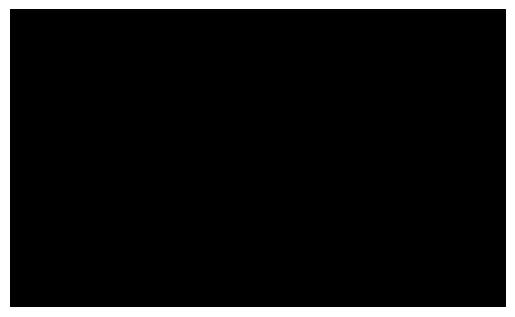

Component Areas: [13261.0]


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the captcha image as a binary image with noise
captcha_image = cv2.imread('Test_captchas\ecqn.png', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(captcha_image, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

# Define the flood fill function to label connected components
def flood_fill(image, seed_point, label):
    h, w = image.shape
    mask = np.zeros((h + 2, w + 2), np.uint8)
    cv2.floodFill(image, mask, seed_point, label)

# Define the function to remove small connected components
def remove_small_components(image, p):
    # Convert the image to CV_8UC1 format
    image = np.uint8(image)

    # Find the contours in the binary image
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Initialize a list to store the areas of connected components
    component_areas = []

    # Iterate over the contours and remove small components
    for contour in contours:
        area = cv2.contourArea(contour)
        if area < p:
            cv2.drawContours(image, [contour], -1, 0, thickness=cv2.FILLED)
        else:
            component_areas.append(area)

    return component_areas

# Choose a seed point P (x, y) within the captcha image
seed_point = (105, 25)  # Update with the coordinates of your chosen seed point

# Perform flood fill starting from the seed point and label connected components
label_image = np.zeros_like(binary_image, dtype=np.int32)
label = 1
flood_fill(label_image, seed_point, label)

# Set the threshold value for removing small components (adjust as needed)
p = 1

# Remove connected components with fewer pixels than the threshold and get component areas
component_areas = remove_small_components(label_image, p)

# Display the resulting image using matplotlib
plt.imshow(label_image, cmap='gray')
plt.axis('off')
plt.show()

# Print the areas covered by the components
print("Component Areas:", component_areas)


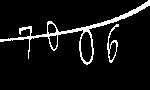

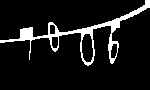

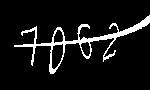

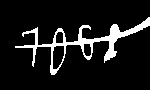

In [ ]:
captch_folder = "Example/"
captcha_images=  glob.glob(os.path.join(captch_folder, "*"))
for file in captcha_images:
    #Get the file name
    mystr = file.split('/')
    value = mystr[-1].split('\\')[1].split('.')[0]
    #Read image
    image = cv2.imread(file)
    #gray scaled image
    gray_scale = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    #Adding threshold to the image
    image = cv2.threshold(gray_scale,0,255,cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)[1]
    cv2_imshow(image)
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,8))
    morph_img = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    cv2_imshow(morph_img)

In [ ]:
from google.colab import files
import os

dir_to_zip = '/content/Generated_captchas' #@param {type: "string"}
output_filename = 'Generated_captchas.zip' #@param {type: "string"}
delete_dir_after_download = "No"  #@param ['Yes', 'No']

os.system( "zip -r {} {}".format( output_filename , dir_to_zip ) )

if delete_dir_after_download == "Yes":
    os.system( "rm -r {}".format( dir_to_zip ) )

files.download( output_filename )

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>